<a href="https://colab.research.google.com/github/feras-nahhal/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales


- Author: Eng.Feras Hani AlNahhal


## Project Overview

## Load and Inspect Data


In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import required packages
import pandas as pd
import numpy as np
import missingno as msno

# Save the filepath and load the data as "df_titanic"

file_path = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(file_path)

In [3]:
#Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data


In [4]:
#1) How many rows and columns?
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 8523, Columns: 12


In [5]:
#2) What are the datatypes of each variable?
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [6]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

np.int64(0)

In [7]:
#4) Identify missing values.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
#5) Address the missing values by using a placeholder value.

# Replace missing values in 'Outlet_Size' with "Missing"
#df['Outlet_Size'] = df['Outlet_Size'].fillna("Missing")

# Replace missing values in 'Item_Weight' with the column's mean
#Item_Weight_mean = df['Item_Weight'].mean()
#df['Item_Weight'] = df['Item_Weight'].fillna(Item_Weight_mean)


In [8]:
#6) Confirm that there are no missing values after addressing them.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [9]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
string_cols = df.select_dtypes(include=['object']).columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

df=df.replace('LF','Low Fat')
df=df.replace('low fat','Low Fat')
df=df.replace('reg','Regular')

Value Counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value Counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value Counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013

In [10]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
number_cols = df.select_dtypes(include=['number']).columns
for col in number_cols:
  print(f"Summary Statistics for {col}")
  print(f"The mean value{df[col].mean()}")
  print(f"The min value{df[col].min()}")
  print(f"The max value{df[col].max()}")
  # Increasing readability by adding an empty line
  print('\n')

Summary Statistics for Item_Weight
The mean value12.857645184135976
The min value4.555
The max value21.35


Summary Statistics for Item_Visibility
The mean value0.06613202877895108
The min value0.0
The max value0.328390948


Summary Statistics for Item_MRP
The mean value140.9927819781767
The min value31.29
The max value266.8884


Summary Statistics for Outlet_Establishment_Year
The mean value1997.8318667135984
The min value1985
The max value2009


Summary Statistics for Item_Outlet_Sales
The mean value2181.288913575032
The min value33.29
The max value13086.9648




<Axes: xlabel='Item_Weight', ylabel='Count'>

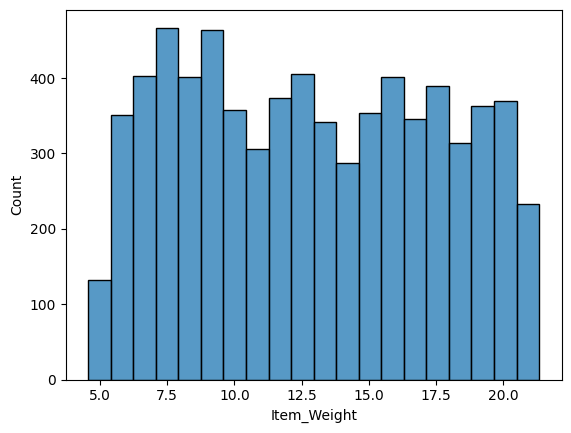

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#Histograms to view the distributions of numerical features in your dataset.
sns.histplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Count'>

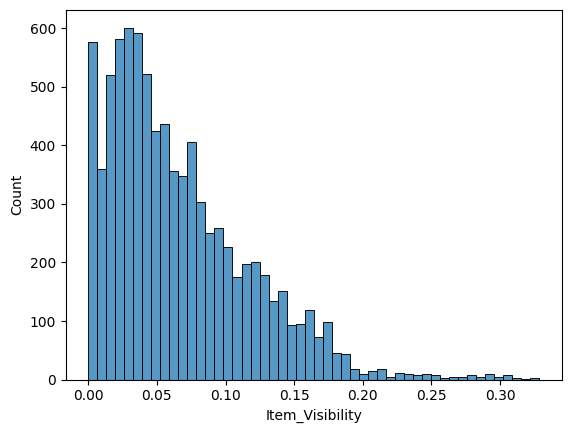

In [18]:
sns.histplot(df['Item_Visibility'])


<Axes: ylabel='Item_Weight'>

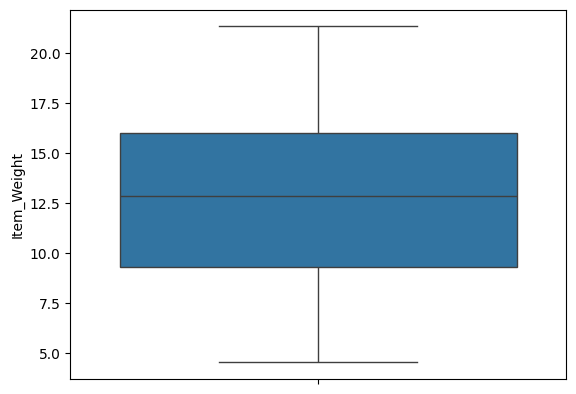

In [ ]:
#Boxplots to view statistical summaries of numerical features in your dataset.
sns.boxplot(df['Item_Weight'])

<Axes: ylabel='Item_Visibility'>

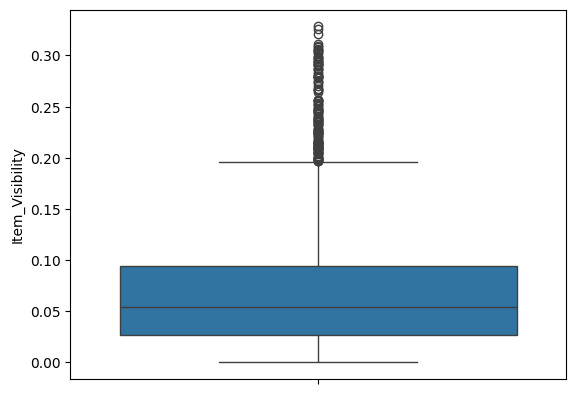

In [ ]:
sns.boxplot(df['Item_Visibility'])

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

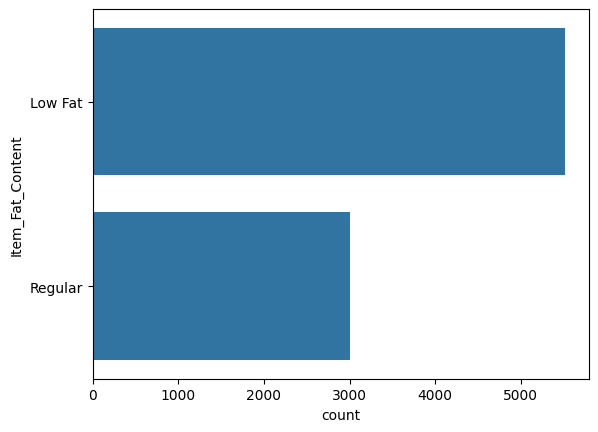

In [16]:
#Countplots to view the frequency of each class of categorial features in your dataset.
sns.countplot(df['Item_Fat_Content'])

<Axes: xlabel='count', ylabel='Outlet_Type'>

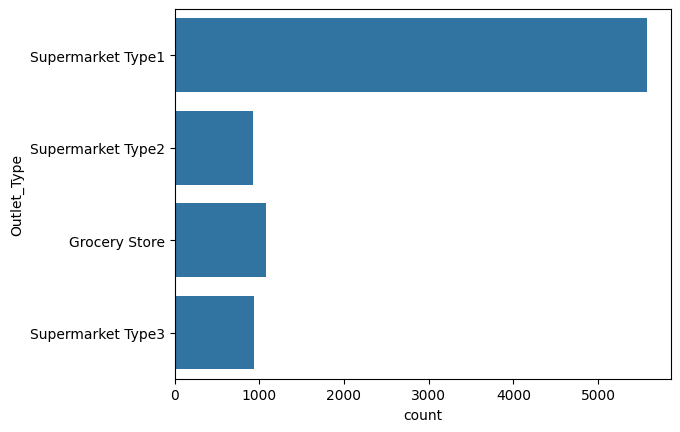

In [22]:
sns.countplot(df['Outlet_Type'])


<Axes: >

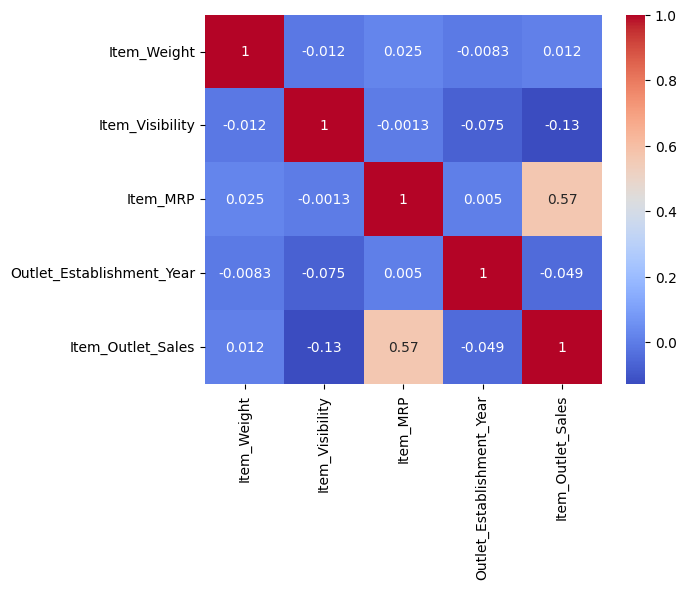

In [ ]:
#Heatmap to view the correlation between features.
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')


## Exploratory Data Analysis


## Feature Inspection
